In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filelocation="C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf = pd.read_csv(filelocation)
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Categorical vs Categorical analysis


In [3]:
#Column name: continent
#output column : case_status
visadf['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [4]:
#How many got the visa by analyzing the case_status and continent where continent ='Asia'

#Validate why it is not working for us where as for sit it is working. 
cond1= visadf['continent']=='Asia'
cond2= visadf['case_status']=='Denied'
cond=cond1&cond2
visadf[cond]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
11,EZYV12,Asia,High School,Y,N,4069,2005,Northeast,70813.0900,Year,Y,Denied
15,EZYV16,Asia,High School,Y,N,4897,1987,West,74108.0200,Year,Y,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...
25450,EZYV25451,Asia,Bachelor's,N,N,3312,2009,Northeast,682.1048,Hour,Y,Denied
25452,EZYV25453,Asia,High School,N,N,70,1995,Northeast,84833.8900,Year,Y,Denied
25454,EZYV25455,Asia,Bachelor's,N,N,1316,2007,South,62844.9700,Year,Y,Denied
25459,EZYV25460,Asia,High School,Y,N,4727,1990,Midwest,53952.8400,Year,Y,Denied


In [5]:
cond1= visadf['continent']=='Asia'
cond2= visadf['case_status']=='Certified'
cond3= visadf['case_status']=='Denied'
certified_cond=cond1&cond2
denied_cond=cond1&cond3
print(f"{len(visadf[certified_cond])} have got from Asia")
print(f"{len(visadf[denied_cond])} have rejected from Asia")

11012 have got from Asia
5849 have rejected from Asia


In [6]:
#Looping through the continetns
labels = visadf['continent'].value_counts().keys()

certified=[]
denied=[]
for i in labels:
    cond1= visadf['continent']==i
    cond2= visadf['case_status']=='Certified'
    cond3= visadf['case_status']=='Denied'
    certified_cond=cond1&cond2
    denied_cond=cond1&cond3
    print(f"{len(visadf[certified_cond])} have got from {i}")
    print(f"{len(visadf[denied_cond])} have rejected from {i}")
    certified.append(len(visadf[certified_cond]))
    denied.append(len(visadf[denied_cond]))
    
visaStatus=pd.DataFrame(zip(labels,certified,denied),columns=['Continent','certified','Denied']).set_index('Continent')
visaStatus

11012 have got from Asia
5849 have rejected from Asia
2957 have got from Europe
775 have rejected from Europe
2037 have got from North America
1255 have rejected from North America
493 have got from South America
359 have rejected from South America
397 have got from Africa
154 have rejected from Africa
122 have got from Oceania
70 have rejected from Oceania


,certified,Denied
Continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


In [7]:
# The above code can be done using the crosstab method.
col1=visadf['continent']
col2=visadf['case_status']
resultdf=pd.crosstab(col1,col2)

<Axes: xlabel='continent'>

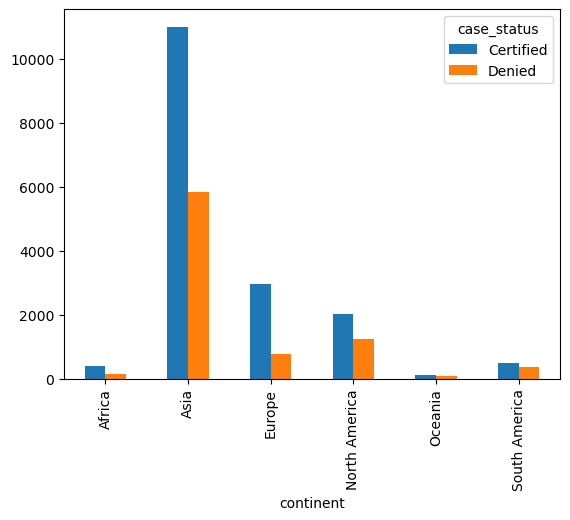

In [8]:
resultdf.plot(kind='bar')

<Axes: xlabel='continent'>

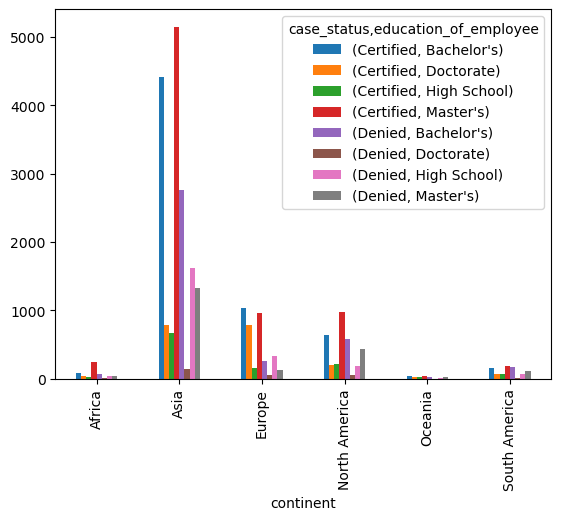

In [9]:
col1=  visadf['continent']
col2=[visadf['case_status'] ,
      visadf['education_of_employee']]
resultdf=pd.crosstab(col1,col2)
resultdf
resultdf.plot(kind='bar')

<Axes: xlabel='education_of_employee'>

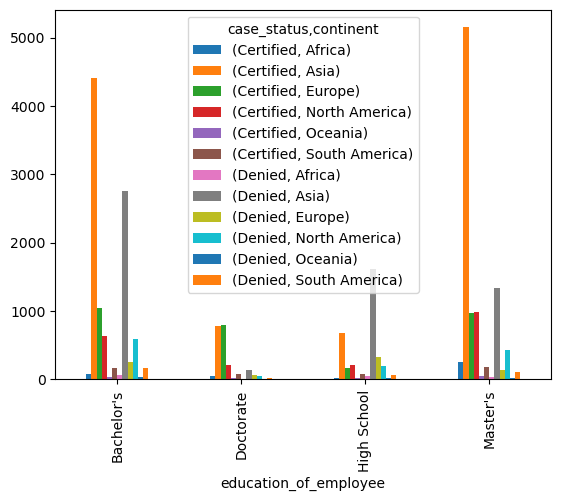

In [10]:
col1=  visadf['education_of_employee']
col2=[visadf['case_status'] ,
      visadf['continent']]
resultdf=pd.crosstab(col1,col2)
resultdf
resultdf.plot(kind='bar')

# Numerical vs Numerical

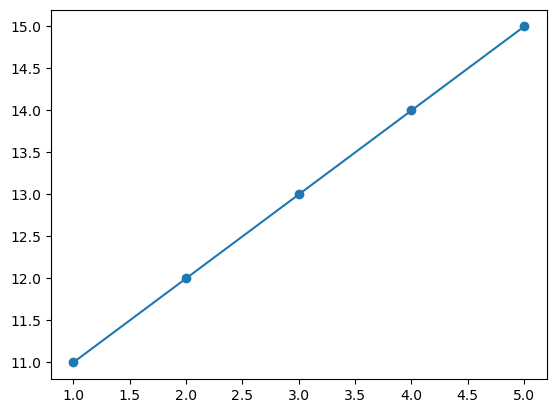

In [11]:
# Scatter Plots
#- plt.scatter
#- Will take two arguements x and y axis
#- Both should be numerical
#- It provides the relation between two variables
#- Positively related
#- negatively related
#- No Relations. 

x=[1,2,3,4,5]
y=[11,12,13,14,15]
plt.scatter(x,y)
plt.plot(x,y)

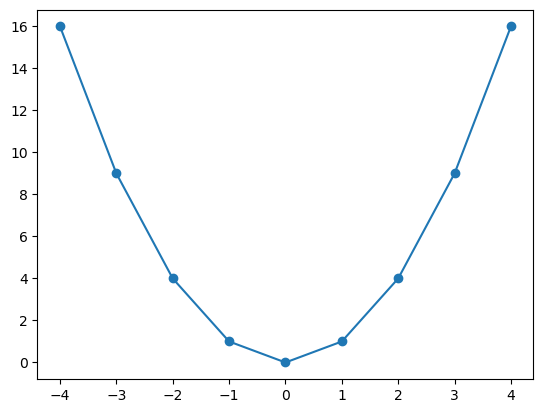

In [12]:
#implementing y = x2 graph 

x=[i for i in range(-4,5)]
y=[i*i for i in range(-4,5)]
plt.scatter(x,y)
plt.plot(x,y)

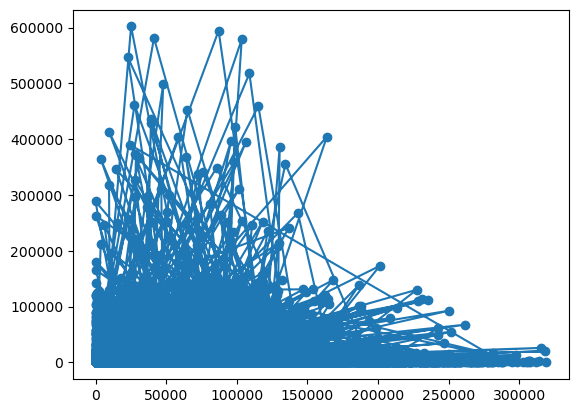

In [13]:
prevailing_wage=visadf['prevailing_wage']
no_of_employees=visadf['no_of_employees']
plt.scatter(prevailing_wage,no_of_employees)
plt.plot(prevailing_wage,no_of_employees)

** Correlation coefficient **
- denoted with r
- pearson correlation coefficient
- r varies from -1 to 1
- if r =-1 to 0 then it is negatively correlated
- if r = 0 to 1 then it positively correlated
- if r = 0 then there is no relation


r = [n(Σxy) − ΣxΣy] / Square root of√[n(Σx2) − (Σx)2][n(Σy2) − (Σy)2]
r= cov(x,y) / standard deviation of x and standard deviation of y

In [14]:
# From the below we see that corelation between yr_of_estab and no_of_emplyoee is -0.01 which is almost 0 means no relation
#like wise if you check yr_of_estab with prevailing_Wage is also 0
# likewise prevailing_Wage and no_of_employees is also 0 
visadf.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


$ HeatMap

<Axes: >

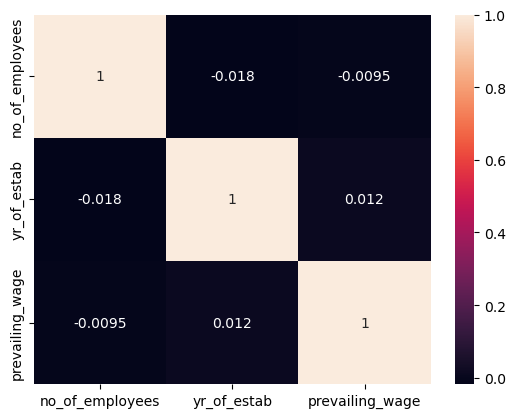

In [15]:
#sns.heatmap(<covariance matrix>)
# In heat map the values ranges from 0 to 1 , if you see the right side scale
corr = visadf.corr(numeric_only=True)
#sns.heatmap(corr)
sns.heatmap(corr,annot=True)

In [19]:
d1={}
labels=visadf['continent'].unique()
for i in range(len(labels)):
    d1[labels[i]]=i
    
visadf['continent']=visadf['continent'].map(d1)
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,0,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,0,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,0,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,0,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,1,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,0,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,0,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,0,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,0,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Approach - 2
- Read the data again 


In [18]:
filelocation="C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf = pd.read_csv(filelocation)
visadf.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


 - np.where is a kind of if-else
 - np.where is useful for binary condition
 - which means it is useful for the columns having two labels
- np.where will take 3 parameters
 - condition
 - True value
 - False value
    
- I want to replace case status column with 1 when it is denied
- Otherwise it is zero
- condition=visadf['case_status']=='Denied'
- True value=1  False value =0
- np.where(condition,<True value>,<False value>)

In [20]:
con=visadf['case_status']=='Denied'
visadf['case_status']=np.where(con,1,0)
visadf.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,0,High School,N,N,14513,2007,West,592.2029,Hour,Y,1
1,EZYV02,0,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,0
2,EZYV03,0,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,1
3,EZYV04,0,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,1
4,EZYV05,1,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,0


# Approach 3 
- $One-hot-encoder$
- pd.getDummies()
- one hot encoder means that at a time only one will be ON and the other is OFF
- ON represent with 1 and OFF represents with 0
- One hot encoder creates new extra columns based on labels in the column
- For example case_status has two unique labels
- If you apply one hot encoder on case_status it creates two extra columns
- which are 
       - case_status_Denied
       - case_status_Certified
       
 | case_status | case_status_Denied | case_Status_Certified
 |-------------|--------------------|----------------------|
 |Denied|1|0
 |Certified|0|1
 
 -Advantage 
 One hot encode gives independence between variables. It is one of the important property before applying into the machine learning models. 
 - variables are independent to each other
 - variables are perpendicular to each other
 - variable are orthogonal to each other
 - variables are 90 degress phase shift.
 
-Disadvantage
 - Assume that if the column has 100 unique lables , if we apply one hot encoder then it will create 100 new columns
 - The data matrix will become sparse. 
 - We require more time and memory to compute the calculations. 
 - This is called curse of dimensionality
 
 
 ** Note: Drop the unique ID columns before applying the one hot encoder as it generates more columns else it will generate new column for every unique Id. 

In [21]:
filelocation="C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf = pd.read_csv(filelocation)
visadf.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [23]:
#drop the id before applying the one hot encoder
filelocation="C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf = pd.read_csv(filelocation)
# drop the Id
visadf.drop('case_id',axis=1,inplace=True)
# apply the one hot encoder
pd.get_dummies(visadf,dtype=int)

,no_of_employees,yr_of_estab,prevailing_wage,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,...,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y,case_status_Certified,case_status_Denied
0,14513,2007,592.2029,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
1,2412,2002,83425.6500,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,44444,2008,122996.8600,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
3,98,1897,83434.0300,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
4,1082,2005,149907.3900,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,2601,2008,77092.5700,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,1,1,0
25476,3274,2006,279174.7900,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
25477,1121,1910,146298.8500,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
25478,1918,1887,86154.7700,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0


# Approach 4
- Label Encoder
- We already implemented  map method by our own 
- The same map method implemented  as Python Package way
- Package name is : **sklearn** (This is heart of ML language)
- Method name: **LabelEncoder**
- sklearn package approach is very easy.
    - Step 1: Read the package
    - Step 2: Save the package
    - Step 3: Apply fit transform


In [30]:
filelocation="C:\\Users\\ADMIN\\Desktop\\Python\\Files\\Visadataset.csv"
visadf = pd.read_csv(filelocation)
print(visadf['continent'].values[:10])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in visadf.select_dtypes(include='object').columns:
    visadf[i]=le.fit_transform(visadf[i])

#visadf['continent']=le.fit_transform(visadf['continent'])
#visadf['education_of_employee']=le.fit_transform(visadf['education_of_employee'])
#visadf['has_job_experience']=le.fit_transform(visadf['has_job_experience'])
visadf

['Asia' 'Asia' 'Asia' 'Asia' 'Africa' 'Asia' 'Asia' 'North America' 'Asia'
 'Europe']


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,0,1,2,0,0,14513,2007,4,592.2029,0,1,1
1,1,1,3,1,0,2412,2002,2,83425.6500,3,1,0
2,2,1,0,0,1,44444,2008,4,122996.8600,3,1,1
3,3,1,0,0,0,98,1897,4,83434.0300,3,1,1
4,4,0,3,1,0,1082,2005,3,149907.3900,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,17204,1,0,1,1,2601,2008,3,77092.5700,3,1,0
25476,17205,1,2,1,0,3274,2006,2,279174.7900,3,1,0
25477,17206,1,3,1,0,1121,1910,3,146298.8500,3,0,0
25478,17207,1,3,1,1,1918,1887,4,86154.7700,3,1,0


# Inverse Transform


In [34]:
visadf['case_status'] # Transformed data frame
print("Full inverse transformed Data of entire dataset:",le.inverse_transform(visadf['case_status']))

#top 5 
print("Top 5:",le.inverse_transform(visadf['case_status'][:5]))

Full Transformed Data: ['Denied' 'Certified' 'Denied' ... 'Certified' 'Certified' 'Certified']
Top 5: ['Denied' 'Certified' 'Denied' 'Denied' 'Certified']


In [ ]:
 - map
- np.where is only for binary
- one hot encoder pd.getdummies
- labelEncoder sklearn